#### Importing Required Libraries, Reading and Understanding the Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Create Dataframe and Read the dataset using Pandas
df = pd.read_csv('Algerian_forest_fires_dataset.csv', header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


There are some missing values in the dataset. Also, the columns are identified as object. To correct this we need to remove rows with strings.

### Data Cleaning

In [5]:
df[df.isnull().any(axis=1)] #columns with null values

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset consists of the data from 2 regions, namely: 

1 : Bejaia Region

2 : Sidi-Bel Abbes Region

We need to split data into regions. Therefore, we add new column called as region in which till 122th index region = 1 and after that region = 2.

In [6]:
#Adding new column for region
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']] = df[['Region']].astype(int)

In [7]:
df.isnull().sum() #checking null values

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [8]:
df =df.dropna().reset_index(drop=True)

In [9]:
df.shape

(244, 15)

In [10]:
# Column which has string
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [11]:
#removing 122th column
df= df.drop(122).reset_index(drop=True)

In [12]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [13]:
# List out column names to check misspaced columns
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [14]:
# Spaces were fixed in the column names
df.columns = df.columns.str.strip()
df.columns 

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [15]:
# Changing datatype of certain columns to int

df[['month', 'day', 'year', 'Temperature','RH', 'Ws']] = df[['month', 'day', 'year', 'Temperature','RH', 'Ws']].astype(int)

In [16]:
# Changing datatype of other columns to float
ls = [column for column in df.columns if df[column].dtypes=='O']
for i in ls:
    if i != 'Classes':
        df[i] = df[i].astype(float)

In [17]:
# check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [19]:
# Analysing target variable i.e. classes
df.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

There's some inconsistency in unique values. We need to strip the string so as to bring them under two categories.

In [20]:
df.Classes = df.Classes.str.strip()

In [21]:
df.Classes.value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

#### The dataset is cleaned and good to perform EDA

#### EDA

In [22]:
#Since we are looking for weather features we don't need date, year and month columns. Therefore, dropping them.
df1 = df.drop(['day','month','year'], axis=1)

In [23]:
# We have categorical data in the classes feature. Hence, we are going to use encoding technique to convert it into numerical.
# Not Fire as 0 and Fire as 1
df1['Classes']= np.where(df1['Classes']== 'not fire',0,1)

In [24]:
#checking classes feature
df1.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [25]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


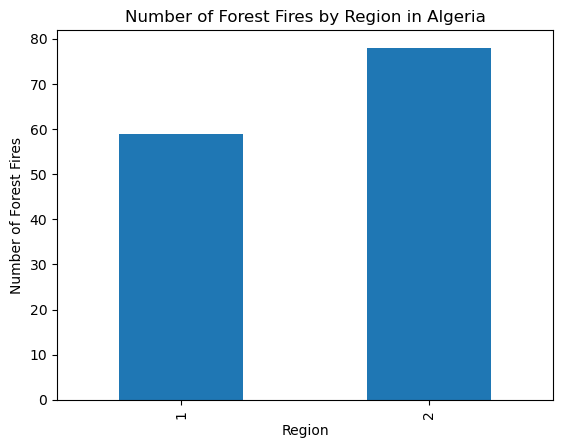

In [26]:
fires_by_region = df1.groupby("Region")["Classes"].sum()

# bar plot showing the number of forest fires in each region
fires_by_region.plot(kind="bar")
plt.title("Number of Forest Fires by Region in Algeria")
plt.xlabel("Region")
plt.ylabel("Number of Forest Fires")
plt.show()

#### The region 2 (Sidi-Bel Abbes Region) has more incidents of forest fires than region 1 (Bejaia Region)

<AxesSubplot: xlabel='Temperature', ylabel='RH'>

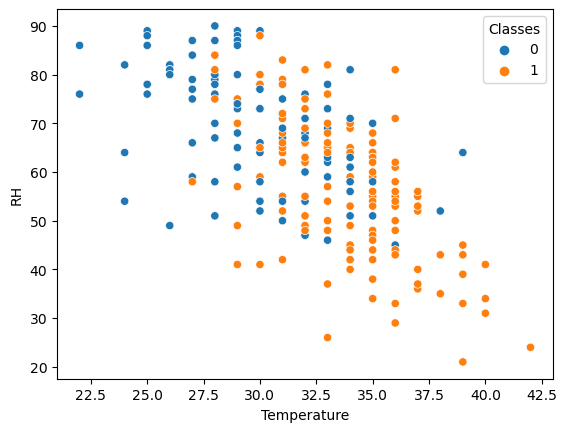

In [27]:
sns.scatterplot(data=df1,x='Temperature',y='RH',hue='Classes')

#### The forest fire is likely to occur when the Temperature is above 30 degree celsius and relative humidity between 30 to 75 %

In [28]:
cr = df1.corr()

<AxesSubplot: >

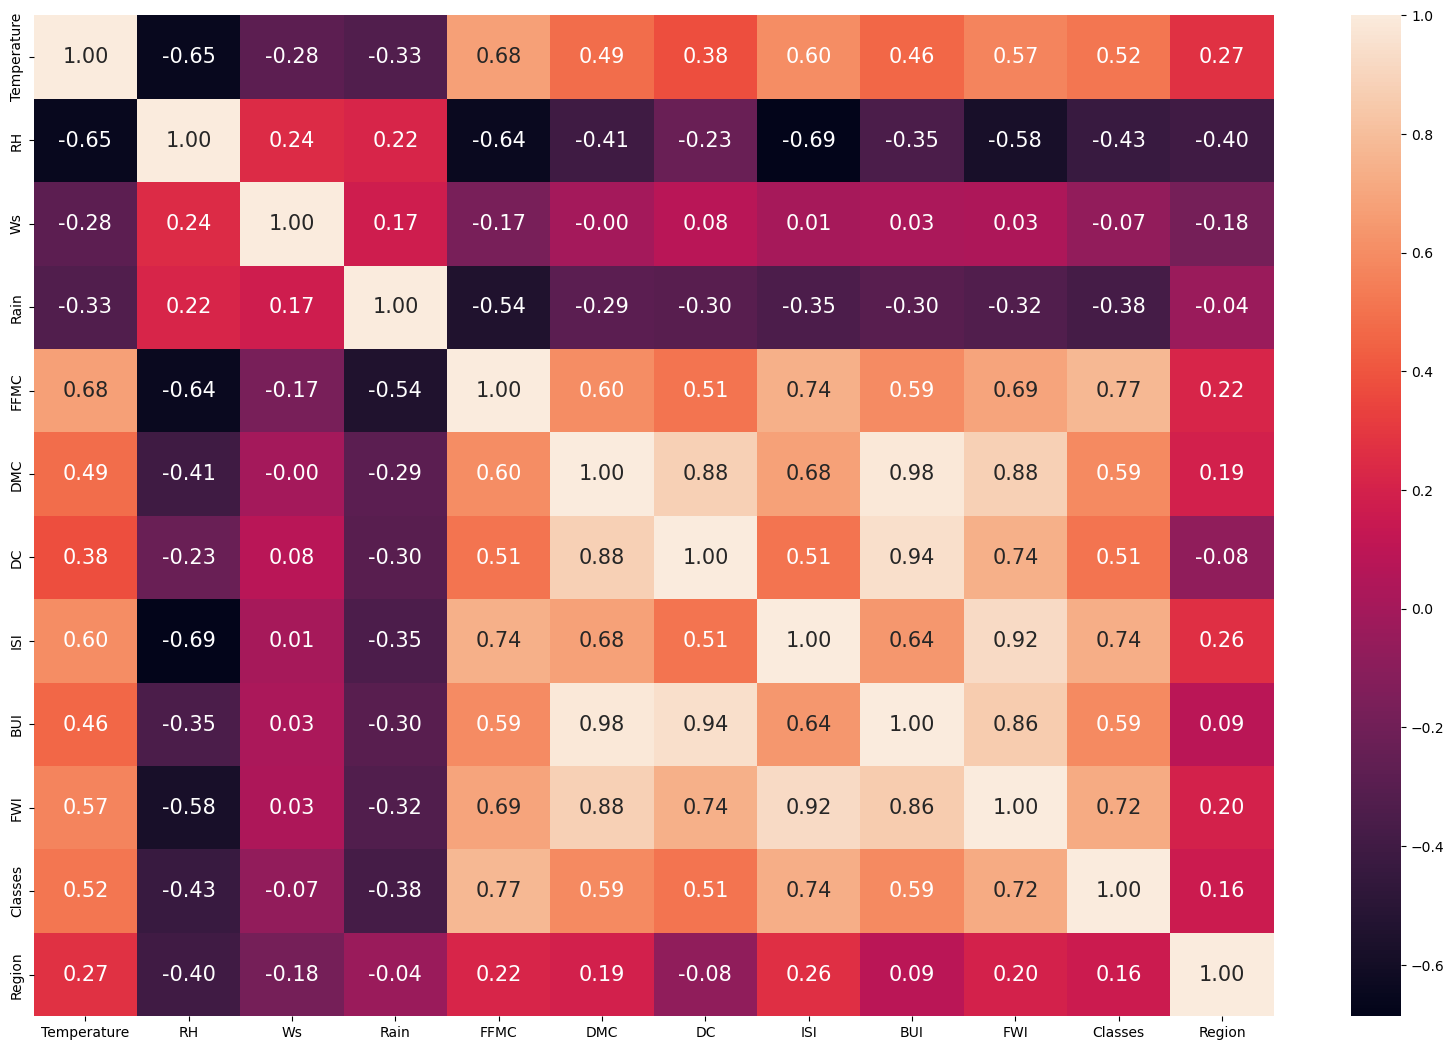

In [29]:
f, ax = plt.subplots(figsize=(20, 13))
sns.heatmap(cr,annot=True,fmt='.2f', annot_kws={'size': 15})

#### Observations:
1. There's a strong correlation between BUI(Buildup Index) and DMC (Duff Moisture Code).
2. BUI(Buildup Index) and DC (Drought Code) has a good correlation among each other.

In [32]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [48]:
df['Classes']= np.where(df['Classes']== 'not fire',0,1)

In [49]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [50]:
monthly_counts = df.groupby('month')['Classes'].count()

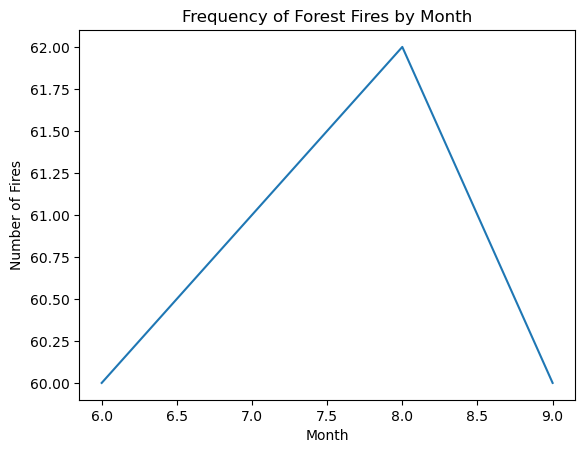

In [52]:
plt.plot(monthly_counts)
plt.title('Frequency of Forest Fires by Month')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.show()

#### The August Month has more no of forest fires reported.

In [53]:
# A function is created to find out distribution of forest fires w.r.to different parameters
def barchart(feature,xlabel):
    plt.figure(figsize=[14,8])
    by_feature =  df1.groupby([feature], as_index=False)['Classes'].sum()
    ax = sns.barplot(x=feature, y="Classes", data=by_feature[[feature,'Classes']], estimator=sum)
    ax.set(xlabel=xlabel, ylabel='Fire Count')

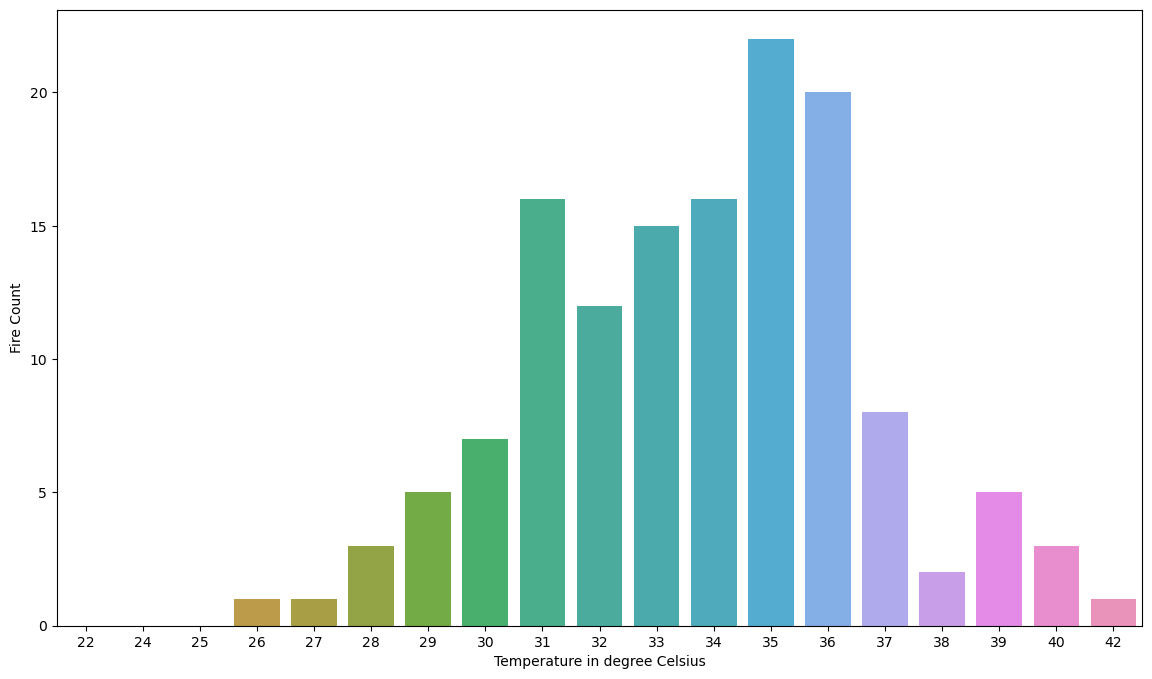

In [54]:
barchart('Temperature','Temperature in degree Celsius')

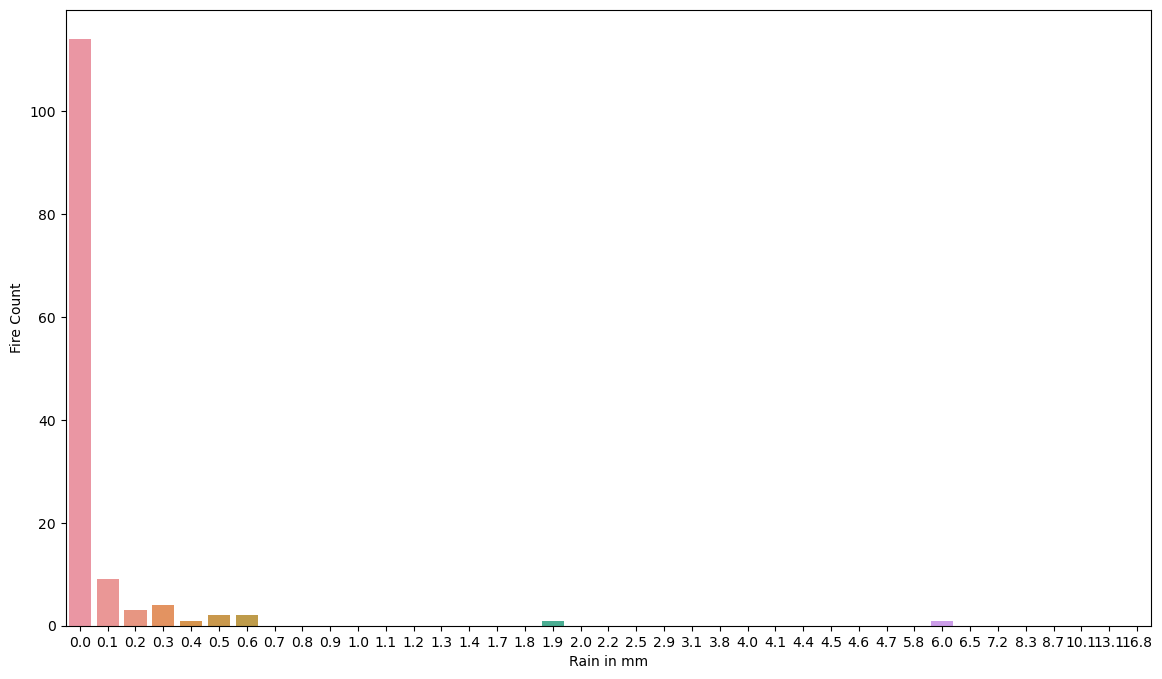

In [55]:
barchart('Rain', 'Rain in mm')

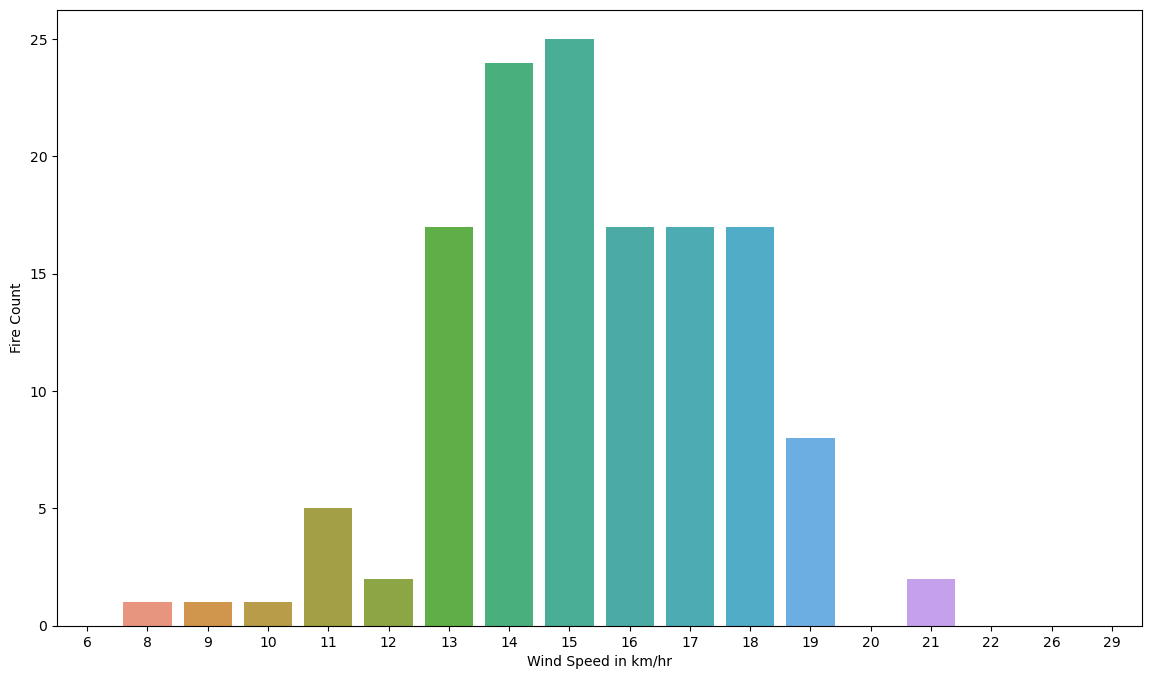

In [56]:
barchart('Ws', 'Wind Speed in km/hr')

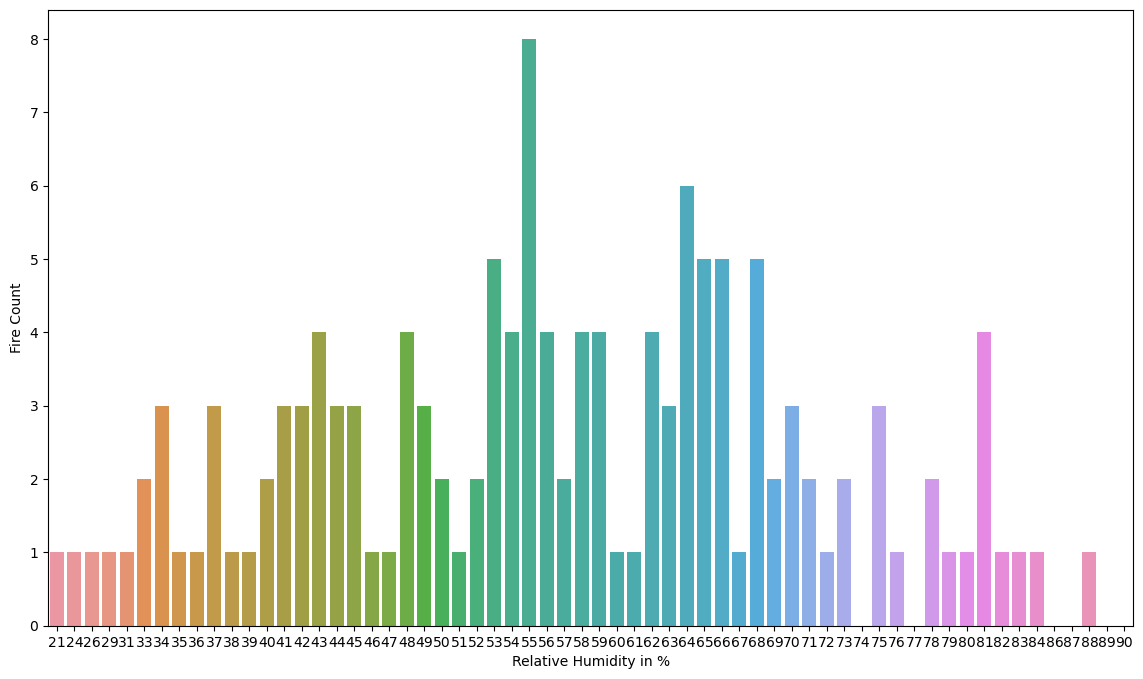

In [58]:
barchart('RH','Relative Humidity in %')

### Observations from above Graphs:
1. Temperature: Highest Fire counts happened between 30-37 degree Celsius.
2. Rain: Highest Fire counts happened when there was no rain to very less rain ie. 0.0 to 0.3.
3. Wind Speed: Highest Fire count happened when the wind speed is between 13 to 19 Km/hr.
4. Relative Humidity: Highest fire count happened when the RH is between 50 to 80%.

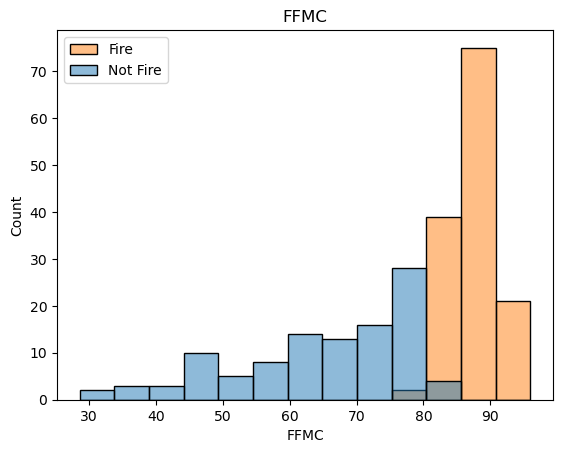

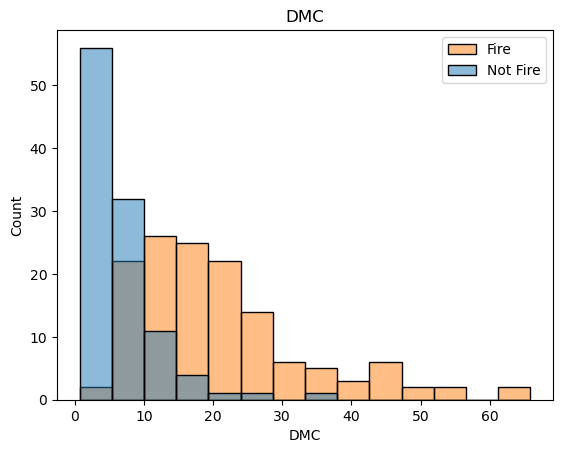

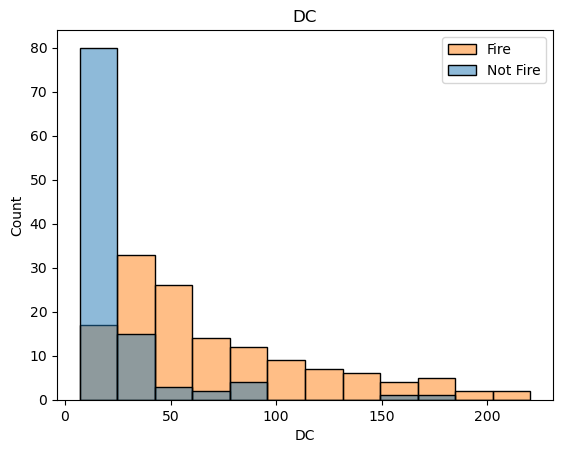

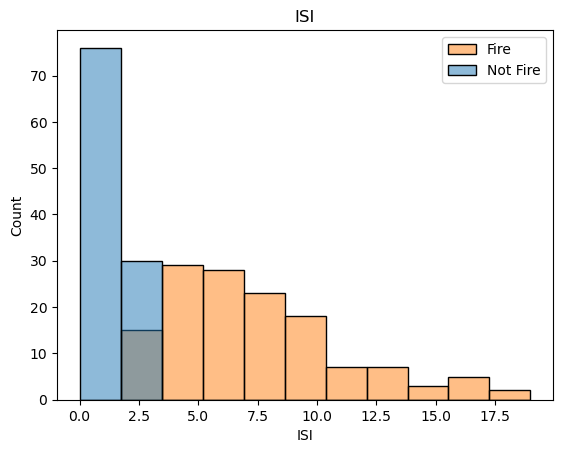

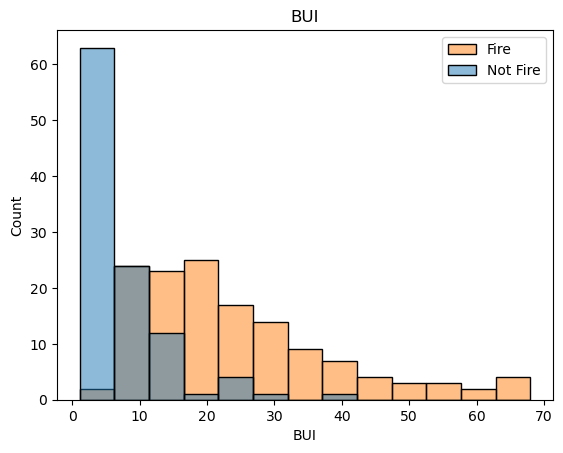

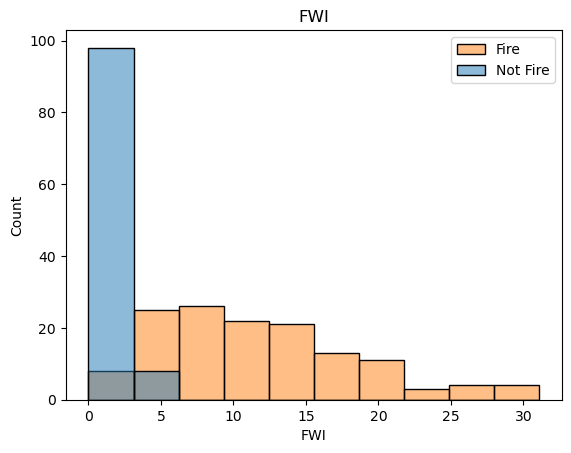

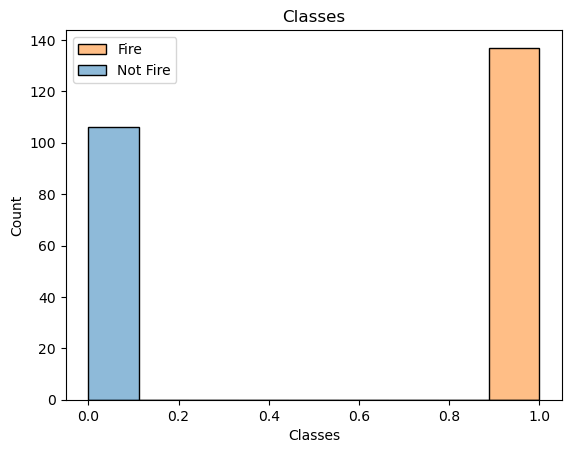

In [59]:
dftemp = df1.drop(['Region','Temperature','Rain','Ws','RH'], axis=1)
for feature in dftemp:
    sns.histplot(data = dftemp,x=feature, hue = 'Classes')
    plt.legend(labels=['Fire','Not Fire'])
    plt.title(feature)
    plt.show()

### Observations
1. Fine Fuel Moisture Code (FFMC) index ranges between 28.6 to 92.5, and from plot FFMC index above 75 has higher chance of Forest fires.

2. Duff Moisture Code (DMC) index  ranges between 1.1 to 65.9, from plot DMC index between 1.1 and 10 has lower chance of Forest fires whereas, above 10-30 DMC has very high evidence of Forest fires in past.

3. Drought Code (DC) index  ranges between 7 to 220.4, and from plot values b/w 0 - 25 is safe and has lower chance of Forest fires whereas range above 25 DC has higher chance of forest fires.

4. Initial Spread Index (ISI) index  ranges between 0 to 18, from plot values b/w 0-3 has lower Forest fires and above 3 ISI has higher chance of Forest fires.

5. Buildup Index (BUI) index which ranges between 1.1 to 68, and values b/w 1.1 to 10 has lower Forest fire chance and above 10 BUI has higher chance of forest fires.

6. Fire Weather Index (FWI) Index which ranges between 1 to 31.1, here 0-3 has lower chance of Forest fires and 3-25 FWI has higher chance of forest fires.